<a href="https://colab.research.google.com/github/mohini111/CE888_lab/blob/main/CNNLAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [ ]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### compile and fit model 

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 6s 5ms/step - loss: 0.4526 - accuracy: 0.8558 - val_loss: 0.0595 - val_accuracy: 0.9819
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0483 - val_accuracy: 0.9852
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0506 - val_accuracy: 0.9855
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0379 - val_accuracy: 0.9901
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.0350 - val_accuracy: 0.9911


#### evaluate model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0234 - accuracy: 0.9928


0.9927999973297119

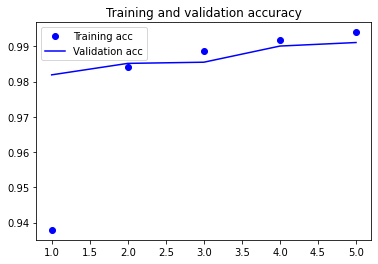

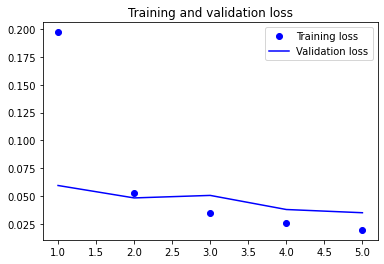

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import activations

activation = ['relu', 'tanh']
optimizer = ['rmsprop', 'Adam']

def exercise1(activation=activation, optimizer=optimizer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation=activation, input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3,3), activation=activation))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3,3), activation=activation))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

epochs = [5, 10]
model = KerasClassifier(build_fn=exercise1, batch_size=64, validation_split=0.2)

In [ ]:
param_grid = {
     'epochs': epochs,
     'activation': activation,
     'optimizer': optimizer
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(train_images, train_labels)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] activation=relu, epochs=5, optimizer=rmsprop ....................
Epoch 1/5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


600/600 [==============================] - 3s 5ms/step - loss: 0.5036 - accuracy: 0.8373 - val_loss: 0.0726 - val_accuracy: 0.9784
Epoch 2/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0658 - accuracy: 0.9799 - val_loss: 0.0612 - val_accuracy: 0.9816
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0443 - val_accuracy: 0.9867
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0466 - val_accuracy: 0.9870
Epoch 5/5
188/188 [==============================] - 1s 3ms/step - loss: 0.0461 - accuracy: 0.9870
[CV] ..... activation=relu, epochs=5, optimizer=rmsprop, total=  14.0s
[CV] activation=relu, epochs=5, optimizer=rmsprop ....................
Epoch 1/5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.0s remaining:    0.0s


600/600 [==============================] - 3s 5ms/step - loss: 0.5118 - accuracy: 0.8344 - val_loss: 0.0709 - val_accuracy: 0.9784
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0639 - accuracy: 0.9800 - val_loss: 0.0529 - val_accuracy: 0.9840
Epoch 3/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0423 - accuracy: 0.9878 - val_loss: 0.0485 - val_accuracy: 0.9856
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 5/5
188/188 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9904
[CV] ..... activation=relu, epochs=5, optimizer=rmsprop, total=  14.2s
[CV] activation=relu, epochs=5, optimizer=rmsprop ....................
Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 0.5280 - accuracy: 0.8309 - val_loss: 0.0732 - val_accuracy: 0.9804
Epoch 2/5
600/600 [==============================] - 3s 4ms/step

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 13.6min finished


750/750 [==============================] - 4s 4ms/step - loss: 0.4653 - accuracy: 0.8496 - val_loss: 0.0651 - val_accuracy: 0.9809
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.0501 - val_accuracy: 0.9859
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0385 - accuracy: 0.9873 - val_loss: 0.0489 - val_accuracy: 0.9851
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0382 - val_accuracy: 0.9902
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0474 - val_accuracy: 0.9892
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.0360 - val_accuracy: 0.9909
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.0454 - val_accuracy: 0.9898
Epoch 8/10
750/75

GridSearchCV(cv=5, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4c37126910>,
             iid='deprecated', n_jobs=1,
             param_grid={'activation': ['relu', 'tanh'], 'epochs': [5, 10],
                         'optimizer': ['rmsprop', 'Adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
grid_search.best_score_

0.9883833289146423

In [ ]:
grid_search.best_params_

{'activation': 'relu', 'epochs': 10, 'optimizer': 'rmsprop'}

In [ ]:
model = exercise1('relu')
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.4469 - accuracy: 0.8616 - val_loss: 0.0664 - val_accuracy: 0.9795
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0550 - accuracy: 0.9828 - val_loss: 0.0512 - val_accuracy: 0.9861
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0434 - val_accuracy: 0.9880
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0262 - accuracy: 0.9919 - val_loss: 0.0407 - val_accuracy: 0.9901
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0436 - val_accuracy: 0.9899
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0169 - accuracy: 0.9950 - val_loss: 0.0395 - val_accuracy: 0.9883
Epoch 7/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0484 - val_accuracy: 0.9888
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9900


0.9900000095367432

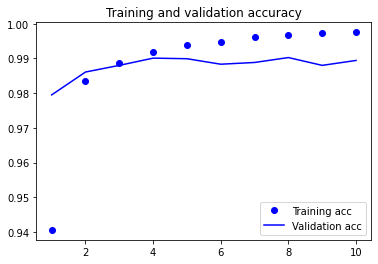

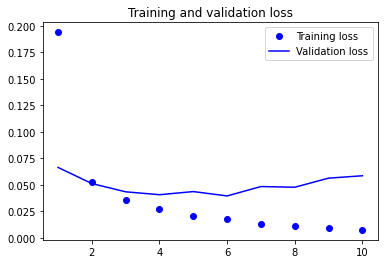

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
grid_results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_epochs,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.451987,0.187093,0.711897,0.024392,relu,5,rmsprop,"{'activation': 'relu', 'epochs': 5, 'optimizer...",0.987000,0.990417,0.986083,0.987667,0.987333,0.987700,0.001457,4
1,12.351657,0.134493,0.682236,0.019508,relu,5,Adam,"{'activation': 'relu', 'epochs': 5, 'optimizer...",0.986250,0.989833,0.979667,0.979417,0.987000,0.984433,0.004170,8
2,26.177941,0.385384,0.704100,0.018219,relu,10,rmsprop,"{'activation': 'relu', 'epochs': 10, 'optimize...",0.988750,0.992583,0.986333,0.985250,0.989000,0.988383,0.002537,1
3,24.498889,0.216222,0.693315,0.016239,relu,10,Adam,"{'activation': 'relu', 'epochs': 10, 'optimize...",0.989000,0.990333,0.987583,0.985333,0.988750,0.988200,0.001679,2
4,14.123541,0.308136,0.718995,0.032497,tanh,5,rmsprop,"{'activation': 'tanh', 'epochs': 5, 'optimizer...",0.985417,0.982417,0.986417,0.984583,0.984917,0.984750,0.001321,7
5,13.052823,0.333553,0.697452,0.037246,tanh,5,Adam,"{'activation': 'tanh', 'epochs': 5, 'optimizer...",0.987083,0.985500,0.985500,0.982583,0.986333,0.985400,0.001527,6
6,28.179797,0.263469,0.692685,0.008468,tanh,10,rmsprop,"{'activation': 'tanh', 'epochs': 10, 'optimize...",0.989417,0.989583,0.988333,0.985750,0.987500,0.988117,0.001405,3
7,26.136947,0.273603,0.721142,0.019539,tanh,10,Adam,"{'activation': 'tanh', 'epochs': 10, 'optimize...",0.988750,0.988250,0.986583,0.983000,0.989167,0.987150,0.002253,5
